# Data Cleaning bom.movie 



In [2]:
import pandas as pd
import numpy as np


In [3]:
!ls


Data Join Visualization.ipynb
README.md
Untitled.ipynb
bom.movie_gross.csv
name.basics.csv
title.akas.csv
title.basics.csv
title.crew.csv
title.principals.csv
title.ratings.csv
zippedData


In [4]:
bom = pd.read_csv('bom.movie_gross.csv')

In [7]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
bom['foreign_gross'] = bom['foreign_gross'].replace(',','', regex = True)
#getting rid of commas so I can covert string to a float

In [9]:
bom['foreign_gross']= bom['foreign_gross'].astype(float)
#converting string to float

In [10]:
top_500_dom = bom.nlargest(500, ['domestic_gross'])

In [11]:
top_500_dom.isna().sum()
#looking to find if there are many null values in the top 500 movies
#null values aren't relevant in top 500 which means we can get rid of all rows that have nulls 


title             0
studio            0
domestic_gross    0
foreign_gross     2
year              0
dtype: int64

In [12]:
bom = bom[bom['domestic_gross'].notna()]

In [13]:
bom = bom[bom['studio'].notna()]

In [14]:
bom = bom[bom['foreign_gross'].notna()]

#getting rid of missing values

In [140]:
bom['worldwide_gross(millions)'] = (bom['domestic_gross'] + bom['foreign_gross'])/(10**6)
bom

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross,worldwide_gross (millons),worldwide_gross(millons),worldwide_gross(millions)
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1067.0000,1067.0000,1067.0000
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,1025.5000,1025.5000,1025.5000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,960.3000,960.3000,960.3000
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,828.3000,828.3000,828.3000
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,752.6000,752.6000,752.6000
...,...,...,...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06,1.5014,1.5014,1.5014
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05,0.9540,0.9540,0.9540
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05,0.2660,0.2660,0.2660
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04,0.0984,0.0984,0.0984


In [142]:
bom = bom.drop('worldwide_gross (millons)', 1)
bom = bom.drop('worldwide_gross(millons)', 1)
bom

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross,worldwide_gross(millions)
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1067.0000
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,1025.5000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,960.3000
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,828.3000
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,752.6000
...,...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06,1.5014
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05,0.9540
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05,0.2660
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04,0.0984


## Data cleaning name.basics



In [17]:
n_b = pd.read_csv('name.basics.csv')

In [19]:
n_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [20]:
n_b = n_b.drop('birth_year', 1)
#deleted birth year because not relevant

In [21]:
n_b = n_b[n_b['death_year'].isna()]
#got rid of any people who are dead

In [22]:
n_b = n_b.drop('death_year', 1)
#got rid of death year because no longer relevant

In [23]:
n_b = n_b[n_b['known_for_titles'].notna()]
# got rid of na values in title id

In [24]:
n_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569766 entries, 0 to 606647
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   nconst              569766 non-null  object
 1   primary_name        569766 non-null  object
 2   primary_profession  529154 non-null  object
 3   known_for_titles    569766 non-null  object
dtypes: object(4)
memory usage: 21.7+ MB


In [25]:
n_b = n_b[n_b['primary_profession'].notna()]
#got rid of na values in primary profession

In [26]:
n_b

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...
606639,nm9989840,Mariya Shekaturova,actor,tt5953804
606640,nm9989854,Layla Louise,"actress,stunts","tt9910102,tt9898328,tt9335490,tt8894778"
606644,nm9990690,Joo Yeon So,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,actress,"tt8734436,tt9615610"


# Data cleaning title.akas

In [27]:
t_a = pd.read_csv('title.akas.csv')

In [28]:
t_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [29]:
t_a = t_a.drop('language', 1)

#dropped language because too many na's


In [30]:
t_a = t_a.drop('types', 1)
#dropped types because too many na's, not relevant

In [31]:
t_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   attributes         14925 non-null   object 
 5   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.2+ MB


In [32]:
t_a = t_a.drop('attributes', 1)
#dropped attributes because too many na's

In [179]:
# t_a.set_index('title_id', inplace = True)
# setting the title id as index

In [33]:
t_a.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 12.7+ MB


In [34]:
is_original_title = t_a['is_original_title'] == 1

In [35]:
is_original_title = t_a[is_original_title]

In [36]:
t_a = is_original_title
#I only want original titles to get rid of repeats

In [37]:
t_a = t_a.drop('region', 1)

In [38]:
t_a = t_a.drop('ordering', 1)
#region and ordering are not relevant 

In [59]:
# Create new column tconst listing title id
t_a['tconst'] = t_a['title_id']

In [61]:
# Drop column title id since it is duplicate
t_a = t_a.drop('title_id', 1)
t_a

,title,is_original_title,tconst
38,Jurassic World,1.0,tt0369610
80,John Carter,1.0,tt0401729
83,Versailles Rediscovered - The Sun King's Vanis...,1.0,tt10010134
86,Miguelito - Canto a Borinquen,1.0,tt10027708
90,Thing I Don't Get,1.0,tt10050722
...,...,...,...
331690,Anderswo. Allein in Afrika,1.0,tt9723084
331692,Monkey King: The Volcano,1.0,tt9726638
331696,Big Shark,1.0,tt9755806
331698,Sayonara kuchibiru,1.0,tt9827784


#data cleaning title basics

In [137]:
!ls

Data Cleaning.ipynb
README.md
bom.movie_gross.csv
name.basics.csv
rt.movie_info.tsv
rt.reviews.tsv
title.akas.csv
title.basics.csv
title.crew.csv
title.principals.csv
title.ratings.csv
tmdb.movies.csv
tn.movie_budgets.csv


# Data cleaning title basics

In [40]:
t_b = pd.read_csv('title.basics.csv')

In [41]:
t_b

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [42]:
t_b = t_b.drop('runtime_minutes', 1)
#don think runtime is relevant data


In [43]:
t_b = t_b[t_b['genres'].notna()]
#getting rid of na values in genres 

In [44]:
t_b = t_b.drop('original_title', 1)
#getting rid of og title because not necessary


# data cleaning title crew

In [45]:
t_c = pd.read_csv('title.crew.csv')


In [46]:
t_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [47]:
t_c = t_c[t_c['directors'].notna()]

In [48]:
t_c = t_c[t_c['writers'].notna()]
#got rid of na values

In [63]:
t_c.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
6,tt0996958,nm2286991,"nm2286991,nm2651190"


KeyError: False

# data cleaning title principals

In [49]:
t_p = pd.read_csv('title.principals.csv')

In [50]:
t_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [51]:
t_p = t_p.drop('characters',1)
# dropped characters not relevant

In [52]:
t_p = t_p.drop('ordering',1)

In [53]:
t_p = t_p.drop('job', 1)

In [54]:
t_p.rename({'category':'job'}, axis = 1, inplace = True)
#changed category to job because more accurate

In [62]:
t_p.head()

,tconst,nconst,job
0,tt0111414,nm0246005,actor
1,tt0111414,nm0398271,director
2,tt0111414,nm3739909,producer
3,tt0323808,nm0059247,editor
4,tt0323808,nm3579312,actress


# Data cleaning title rating

In [55]:
t_r = pd.read_csv('title.ratings.csv')



In [56]:
t_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [57]:
t_r.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# Data Merge & Visualization

In [93]:
# Import python tools for visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
# List the info of the df that are being used
print('bom')
bom.info()
print()
print('n_b')
n_b.info()
print()
print('t_a')
t_a.info()
print()
print('t_b')
t_b.info()
print()
print('t_p')
t_p.info()

bom
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      2007 non-null   object 
 1   studio                     2007 non-null   object 
 2   domestic_gross             2007 non-null   float64
 3   foreign_gross              2007 non-null   float64
 4   year                       2007 non-null   int64  
 5   worldwide_gross            2007 non-null   float64
 6   worldwide_gross(millions)  2007 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 205.4+ KB

n_b
<class 'pandas.core.frame.DataFrame'>
Int64Index: 529154 entries, 0 to 606647
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   nconst              529154 non-null  object
 1   primary_name        529154 non-null  object
 2   primar

In [144]:
# Create a bar chart for average world wide profit for each genre
# Join the dataframe bom, t_a, and t_b into new dataframe pg (profit-gross)
pg1 = bom.merge(t_a, on = 'title', how = 'inner')
# check
#pg1
pg2 = pg1.merge(t_b, on ='tconst', how = 'inner')
pg2

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross,worldwide_gross(millions),is_original_title,tconst,primary_title,start_year,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1067.0000,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,828.3000,1.0,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,752.6000,1.0,tt0892791,Shrek Forever After,2010,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,698.5000,1.0,tt1325004,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,623.9000,1.0,tt1228705,Iron Man 2,2010,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...
1420,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,2.191000e+06,2.1910,1.0,tt3576728,Bilal: A New Breed of Hero,2015,"Action,Adventure,Animation"
1421,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06,1.5014,1.0,tt2160105,I Still See You,2018,"Fantasy,Thriller"
1422,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05,0.9540,1.0,tt4602066,The Catcher Was a Spy,2018,"Biography,Drama,War"
1423,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05,0.2660,1.0,tt6769280,Time Freak,2018,"Comedy,Drama,Romance"


Genre column contains multiple values. Therefore we need to split it.

In [146]:
# split genre with multiple values into 3 separate columns
split_genre = pg2['genres'].str.split(",")
genre = split_genre.to_list()
genre_cols = ['genre 1', "genre 2", "genre 3"]
genre_df = pd.DataFrame(genre, columns=genre_cols)
genre_df.head()

,genre 1,genre 2,genre 3
0,Adventure,Animation,Comedy
1,Action,Adventure,Sci-Fi
2,Adventure,Animation,Comedy
3,Adventure,Drama,Fantasy
4,Action,Adventure,Sci-Fi


In [147]:
# Create a split genre columns in pg2
pg2['genre 1'] = genre_df['genre 1']
pg2['genre 2'] = genre_df['genre 2']
pg2['genre 3'] = genre_df['genre 3']
pg2

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross,worldwide_gross(millions),is_original_title,tconst,primary_title,start_year,genres,genre 1,genre 2,genre 3
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1067.0000,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,828.3000,1.0,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,752.6000,1.0,tt0892791,Shrek Forever After,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,698.5000,1.0,tt1325004,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy",Adventure,Drama,Fantasy
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,623.9000,1.0,tt1228705,Iron Man 2,2010,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,2.191000e+06,2.1910,1.0,tt3576728,Bilal: A New Breed of Hero,2015,"Action,Adventure,Animation",Action,Adventure,Animation
1421,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06,1.5014,1.0,tt2160105,I Still See You,2018,"Fantasy,Thriller",Fantasy,Thriller,None
1422,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05,0.9540,1.0,tt4602066,The Catcher Was a Spy,2018,"Biography,Drama,War",Biography,Drama,War
1423,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05,0.2660,1.0,tt6769280,Time Freak,2018,"Comedy,Drama,Romance",Comedy,Drama,Romance


In [129]:
# Analyze the Genre Frequency for each genre column
genre_df.describe()

,genre 1,genre 2,genre 3
count,1425,1273,930
unique,15,20,19
top,Action,Drama,Thriller
freq,389,355,171


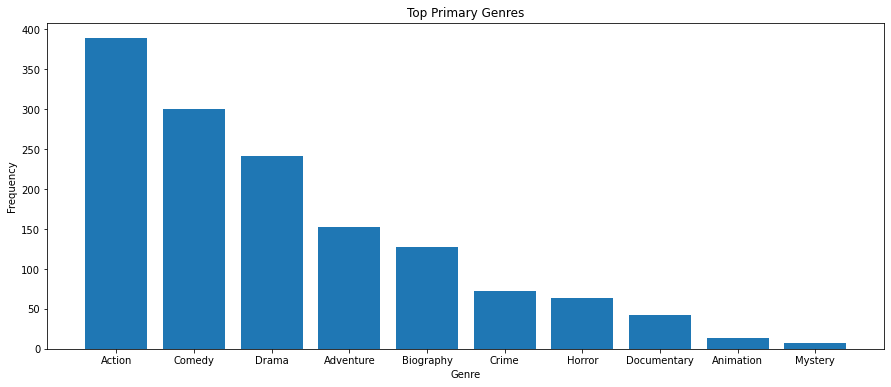

In [120]:
# Primary Genre Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Count the frequency in of each genre in genre 1
data = genre_df['genre 1'].value_counts().head(10)
# Get x and y data
x = data.index
y = data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top Primary Genres')
ax.set_xlabel('Genre')
ax.set_ylabel('Frequency')
# Save figure
plt.savefig('Top Primary Genre.png')

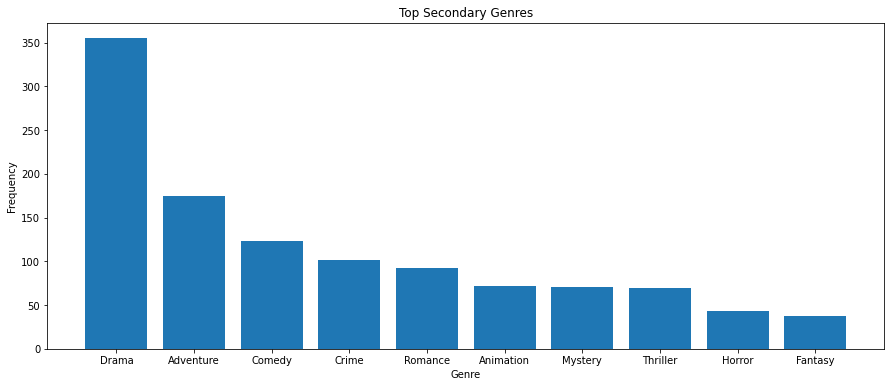

In [121]:
# Secondary Genre Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Count the frequency in of each genre in genre 2
data = genre_df['genre 2'].value_counts().head(10)
# Set x and y data
x = data.index
y = data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top Secondary Genres')
ax.set_xlabel('Genre')
ax.set_ylabel('Frequency')
# Save figure
plt.savefig('Top Secondary Genre.png')

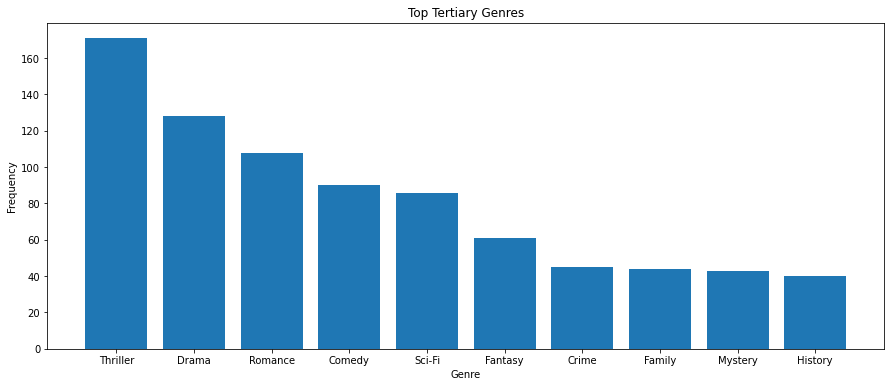

In [122]:
# Tertiary Genre Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Count the frequency in of each genre in genre 3
data = genre_df['genre 3'].value_counts().head(10)
# Get x and y data
x = data.index
y = data.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top Tertiary Genres')
ax.set_xlabel('Genre')
ax.set_ylabel('Frequency')
# Save figure
plt.savefig('Top Tertiary Genre.png')

In [151]:
# Find the average worldwide profit by genre
# Group by the primary genre (genre 1 ) with average worldwide gross profit
profit_genre = pg2.groupby(['genre 1']).worldwide_gross.mean()/(10**6)
profit_genre

genre 1
Action         241.334093
Adventure      277.733003
Animation      197.746808
Biography       71.629573
Comedy          70.539559
Crime           61.043074
Documentary     31.897348
Drama           60.249536
Family         857.600000
Fantasy         27.694100
Horror          99.202727
Music            8.000000
Mystery        108.205000
Romance         35.394775
Thriller        72.305240
Name: worldwide_gross, dtype: float64

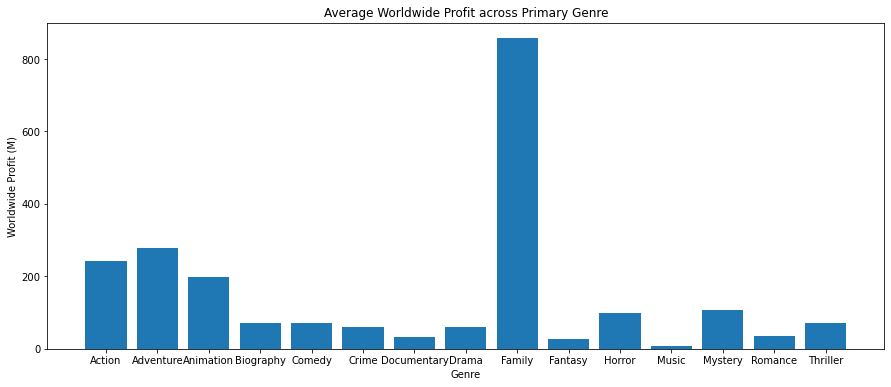

In [155]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Set x and y data
x = profit_genre.index
y = profit_genre.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Average Worldwide Profit across Primary Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Worldwide Profit (M)') # Find an ROI or budget  Rn is revenue 
# Save figure
plt.savefig('Profit Primary Genre.png')

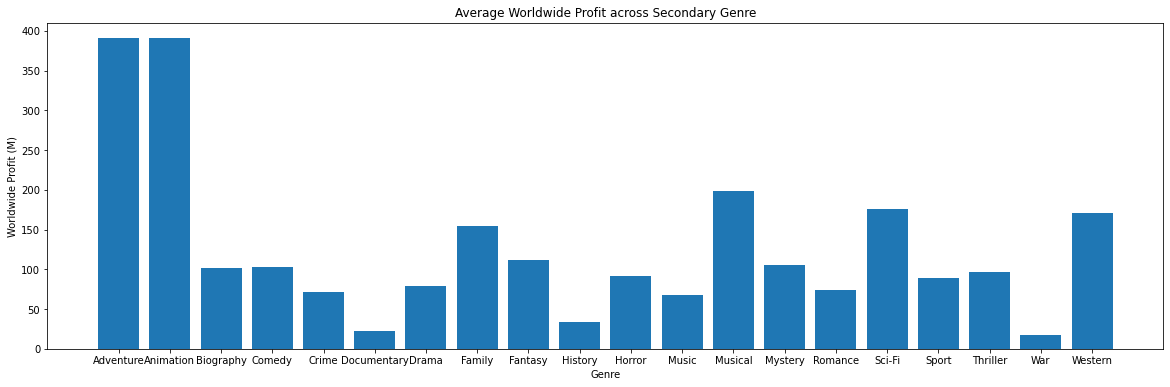

In [159]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20,6))
# Group by the secondary genre (genre 2 ) with average worldwide gross profit
profit_genre2 = pg2.groupby(['genre 2']).worldwide_gross.mean()/(10**6)
# Set x and y data
x = profit_genre2.index
y = profit_genre2.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Average Worldwide Profit across Secondary Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Worldwide Profit (M)')
# Save figure
plt.savefig('Profit Secondary Genre.png')

Text(0, 0.5, 'Worldwide Profit (M)')

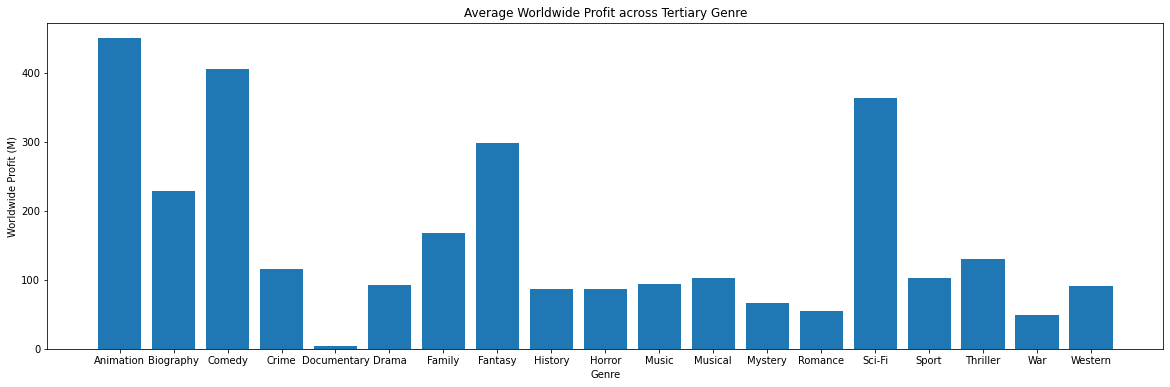

In [172]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20,6))
# Group by the tertiary genre (genre 3 ) with average worldwide gross profit
profit_genre3 = pg2.groupby(['genre 3']).worldwide_gross.mean()/(10**6)
# Set x and y data
x = profit_genre3.index
y = profit_genre3.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Average Worldwide Profit across Tertiary Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Worldwide Profit (M)')
# Save figure
#plt.savefig('Profit Tertiary Genre.png')

In [183]:
#genre_year = {}
#years = pg2['year'].unique().tolist()
#for year in years:
    

In [189]:
# Merge title principle with the profit genre dataframe
pg3 = pg2.merge(t_p, on = 'tconst', how = 'inner')

In [190]:
pg3

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross,worldwide_gross(millions),is_original_title,tconst,primary_title,start_year,genres,genre 1,genre 2,genre 3,genre1,nconst,job
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1067.0000,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,Adventure,nm0005271,composer
1,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1067.0000,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,Adventure,nm0000158,actor
2,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1067.0000,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,Adventure,nm0000741,actor
3,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1067.0000,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,Adventure,nm0000349,actress
4,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1067.0000,1.0,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,Adventure,nm0000885,actor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14097,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,7.320000e+04,0.0732,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,2017,"Biography,Documentary",Biography,Documentary,None,Biography,nm0159510,archive_footage
14098,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,7.320000e+04,0.0732,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,2017,"Biography,Documentary",Biography,Documentary,None,Biography,nm2615851,director
14099,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,7.320000e+04,0.0732,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,2017,"Biography,Documentary",Biography,Documentary,None,Biography,nm4333147,producer
14100,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,7.320000e+04,0.0732,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,2017,"Biography,Documentary",Biography,Documentary,None,Biography,nm1756961,cinematographer


In [191]:
# Merge name basic with the profit genre dataframe
pg4 = pg3.merge(n_b, on = 'nconst', how = 'inner')

In [192]:
pg4

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross,worldwide_gross(millions),is_original_title,tconst,primary_title,...,genres,genre 1,genre 2,genre 3,genre1,nconst,job,primary_name,primary_profession,known_for_titles
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1067.0000,1.0,tt0435761,Toy Story 3,...,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,Adventure,nm0005271,composer,Randy Newman,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338"
1,Monsters University,BV,268500000.0,475700000.0,2013,7.442000e+08,744.2000,1.0,tt1453405,Monsters University,...,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,Adventure,nm0005271,composer,Randy Newman,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338"
2,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1067.0000,1.0,tt0435761,Toy Story 3,...,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,Adventure,nm0000158,actor,Tom Hanks,"producer,actor,soundtrack","tt0094737,tt0162222,tt0120815,tt0109830"
3,Larry Crowne,Uni.,35600000.0,36400000.0,2011,7.200000e+07,72.0000,1.0,tt1583420,Larry Crowne,...,"Comedy,Drama,Romance",Comedy,Drama,Romance,Comedy,nm0000158,actor,Tom Hanks,"producer,actor,soundtrack","tt0094737,tt0162222,tt0120815,tt0109830"
4,Extremely Loud & Incredibly Close,WB,31800000.0,23400000.0,2011,5.520000e+07,55.2000,1.0,tt0477302,Extremely Loud & Incredibly Close,...,"Adventure,Drama,Mystery",Adventure,Drama,Mystery,Adventure,nm0000158,actor,Tom Hanks,"producer,actor,soundtrack","tt0094737,tt0162222,tt0120815,tt0109830"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,7.320000e+04,0.0732,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,...,"Biography,Documentary",Biography,Documentary,None,Biography,nm0118371,self,Joan Juliet Buck,actress,"tt4016454,tt1135503"
13689,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,7.320000e+04,0.0732,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,...,"Biography,Documentary",Biography,Documentary,None,Biography,nm0159485,self,Michael Chow,actor,"tt0120812,tt0062512,tt1078588,tt0122151"
13690,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,7.320000e+04,0.0732,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,...,"Biography,Documentary",Biography,Documentary,None,Biography,nm2615851,director,James Crump,"director,writer,producer","tt5792490,tt1003113,tt4096620"
13691,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,7.320000e+04,0.0732,1.0,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,...,"Biography,Documentary",Biography,Documentary,None,Biography,nm1756961,cinematographer,Robert O'Haire,"sound_department,cinematographer,camera_depart...","tt0780625,tt4123650,tt1961535,tt4683968"


In [298]:
# Rename all merged dataframe to df_merged
df_merged = pg4

In [299]:
df_merged.info()
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      13693 non-null  object 
 1   studio                     13693 non-null  object 
 2   domestic_gross             13693 non-null  float64
 3   foreign_gross              13693 non-null  float64
 4   year                       13693 non-null  int64  
 5   worldwide_gross            13693 non-null  float64
 6   worldwide_gross(millions)  13693 non-null  float64
 7   is_original_title          13693 non-null  float64
 8   tconst                     13693 non-null  object 
 9   primary_title              13693 non-null  object 
 10  start_year                 13693 non-null  int64  
 11  genres                     13693 non-null  object 
 12  genre 1                    13693 non-null  object 
 13  genre 2                    12329 non-null  obj

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross,worldwide_gross(millions),is_original_title,tconst,primary_title,...,genres,genre 1,genre 2,genre 3,genre1,nconst,job,primary_name,primary_profession,known_for_titles
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1067.0,1.0,tt0435761,Toy Story 3,...,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,Adventure,nm0005271,composer,Randy Newman,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338"
1,Monsters University,BV,268500000.0,475700000.0,2013,7.442000e+08,744.2,1.0,tt1453405,Monsters University,...,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,Adventure,nm0005271,composer,Randy Newman,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338"
2,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1067.0,1.0,tt0435761,Toy Story 3,...,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,Adventure,nm0000158,actor,Tom Hanks,"producer,actor,soundtrack","tt0094737,tt0162222,tt0120815,tt0109830"
3,Larry Crowne,Uni.,35600000.0,36400000.0,2011,7.200000e+07,72.0,1.0,tt1583420,Larry Crowne,...,"Comedy,Drama,Romance",Comedy,Drama,Romance,Comedy,nm0000158,actor,Tom Hanks,"producer,actor,soundtrack","tt0094737,tt0162222,tt0120815,tt0109830"
4,Extremely Loud & Incredibly Close,WB,31800000.0,23400000.0,2011,5.520000e+07,55.2,1.0,tt0477302,Extremely Loud & Incredibly Close,...,"Adventure,Drama,Mystery",Adventure,Drama,Mystery,Adventure,nm0000158,actor,Tom Hanks,"producer,actor,soundtrack","tt0094737,tt0162222,tt0120815,tt0109830"


In [303]:
df_merged = df_merged.drop(columns=['domestic_gross','foreign_gross', 'is_original_title', 'primary_title' 
                                    ,'genres', 'start_year', 'nconst', 'primary_profession', 'known_for_titles', 'tconst'], axis = 1)

In [304]:
df_merged.head()

,title,studio,year,worldwide_gross,worldwide_gross(millions),genre 1,genre 2,genre 3,genre1,job,primary_name
0,Toy Story 3,BV,2010,1.067000e+09,1067.0,Adventure,Animation,Comedy,Adventure,composer,Randy Newman
1,Monsters University,BV,2013,7.442000e+08,744.2,Adventure,Animation,Comedy,Adventure,composer,Randy Newman
2,Toy Story 3,BV,2010,1.067000e+09,1067.0,Adventure,Animation,Comedy,Adventure,actor,Tom Hanks
3,Larry Crowne,Uni.,2011,7.200000e+07,72.0,Comedy,Drama,Romance,Comedy,actor,Tom Hanks
4,Extremely Loud & Incredibly Close,WB,2011,5.520000e+07,55.2,Adventure,Drama,Mystery,Adventure,actor,Tom Hanks


In [305]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      13693 non-null  object 
 1   studio                     13693 non-null  object 
 2   year                       13693 non-null  int64  
 3   worldwide_gross            13693 non-null  float64
 4   worldwide_gross(millions)  13693 non-null  float64
 5   genre 1                    13693 non-null  object 
 6   genre 2                    12329 non-null  object 
 7   genre 3                    9017 non-null   object 
 8   genre1                     13693 non-null  object 
 9   job                        13693 non-null  object 
 10  primary_name               13693 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ MB


In [306]:
df_merged['job'].value_counts()

actor                  3420
producer               2710
writer                 2421
actress                2055
director               1501
composer                754
cinematographer         449
editor                  241
self                     72
production_designer      65
archive_footage           5
Name: job, dtype: int64

In [307]:
df_merged.iloc[df_merged['job'] == 'self', df_merged.columns.get_loc('job')] = 'actor'
df_merged.iloc[df_merged['job'] == 'actress',  df_merged.columns.get_loc('job')] = 'actor'

In [309]:
# Check the result
df_merged['job'].value_counts()

actor                  5547
producer               2710
writer                 2421
director               1501
composer                754
cinematographer         449
editor                  241
production_designer      65
archive_footage           5
Name: job, dtype: int64

In [310]:
df_merged

,title,studio,year,worldwide_gross,worldwide_gross(millions),genre 1,genre 2,genre 3,genre1,job,primary_name
0,Toy Story 3,BV,2010,1.067000e+09,1067.0000,Adventure,Animation,Comedy,Adventure,composer,Randy Newman
1,Monsters University,BV,2013,7.442000e+08,744.2000,Adventure,Animation,Comedy,Adventure,composer,Randy Newman
2,Toy Story 3,BV,2010,1.067000e+09,1067.0000,Adventure,Animation,Comedy,Adventure,actor,Tom Hanks
3,Larry Crowne,Uni.,2011,7.200000e+07,72.0000,Comedy,Drama,Romance,Comedy,actor,Tom Hanks
4,Extremely Loud & Incredibly Close,WB,2011,5.520000e+07,55.2000,Adventure,Drama,Mystery,Adventure,actor,Tom Hanks
...,...,...,...,...,...,...,...,...,...,...,...
13688,Antonio Lopez 1970: Sex Fashion & Disco,FM,2018,7.320000e+04,0.0732,Biography,Documentary,None,Biography,actor,Joan Juliet Buck
13689,Antonio Lopez 1970: Sex Fashion & Disco,FM,2018,7.320000e+04,0.0732,Biography,Documentary,None,Biography,actor,Michael Chow
13690,Antonio Lopez 1970: Sex Fashion & Disco,FM,2018,7.320000e+04,0.0732,Biography,Documentary,None,Biography,director,James Crump
13691,Antonio Lopez 1970: Sex Fashion & Disco,FM,2018,7.320000e+04,0.0732,Biography,Documentary,None,Biography,cinematographer,Robert O'Haire


In [246]:
# Create the dataframe that only contains job = director
df_director = df_merged.loc[df_merged['job'] == 'director']
df_director

,title,studio,year,worldwide_gross,worldwide_gross(millions),genre 1,genre 2,genre 3,genre1,job,primary_name
20,Toy Story 3,BV,2010,1.067000e+09,1067.0000,Adventure,Animation,Comedy,Adventure,director,Lee Unkrich
21,Coco,BV,2017,8.071000e+08,807.1000,Adventure,Animation,Comedy,Adventure,director,Lee Unkrich
23,Cars 2,BV,2011,5.622000e+08,562.2000,Adventure,Animation,Comedy,Adventure,director,John Lasseter
26,John Carter,BV,2012,2.842000e+08,284.2000,Action,Adventure,Sci-Fi,Action,director,Andrew Stanton
27,Finding Dory,BV,2016,1.028600e+09,1028.6000,Adventure,Animation,Comedy,Adventure,director,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...
13641,Blindspotting,LG/S,2018,4.830000e+06,4.8300,Comedy,Crime,Drama,Comedy,director,Carlos López Estrada
13670,Bilal: A New Breed of Hero,VE,2018,2.191000e+06,2.1910,Action,Adventure,Animation,Action,director,Khurram H. Alavi
13671,Bilal: A New Breed of Hero,VE,2018,2.191000e+06,2.1910,Action,Adventure,Animation,Action,director,Ayman Jamal
13684,Time Freak,Grindstone,2018,2.660000e+05,0.2660,Comedy,Drama,Romance,Comedy,director,Andrew Bowler


In [256]:
profit_director = df_director.groupby(['primary_name']).worldwide_gross.mean()/(10**6)
profit_director = profit_director.sort_values(ascending = False)
profit_director = profit_director.nlargest(n=10)

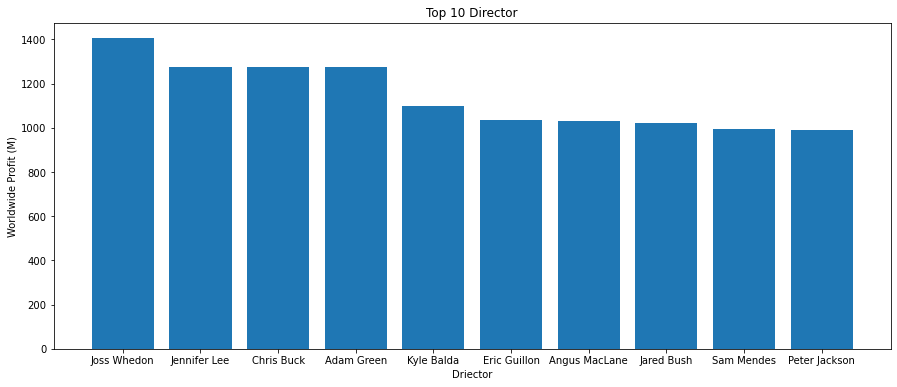

In [261]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Set x and y data
x = profit_director.index
y = profit_director.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Director')
ax.set_xlabel('Driector')
ax.set_ylabel('Worldwide Profit (M)')
# Save figure
plt.savefig('Top 10 Driectors.png')

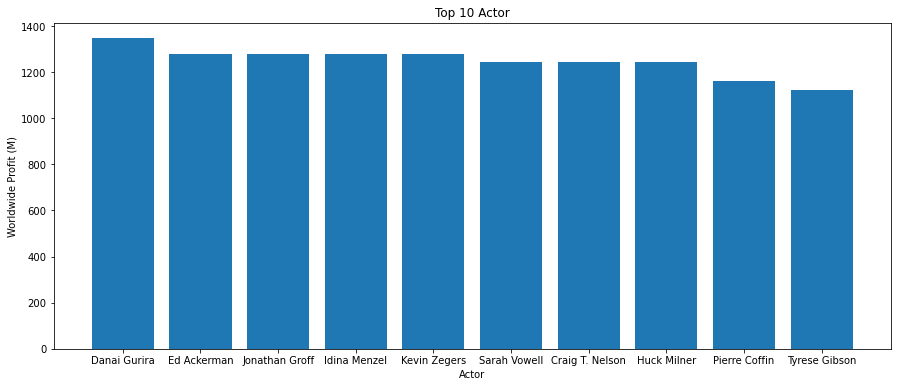

In [262]:
# Create the dataframe that only contains job = actor
df_actor = df_merged.loc[df_merged['job'] == 'actor']
profit_actor = df_actor.groupby(['primary_name']).worldwide_gross.mean()/(10**6)
profit_actor = profit_actor.sort_values(ascending = False)
profit_actor = profit_actor.nlargest(n=10)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Set x and y data
x = profit_actor.index
y = profit_actor.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Actor')
ax.set_xlabel('Actor')
ax.set_ylabel('Worldwide Profit (M)')
# Save figure
plt.savefig('Top 10 Actors.png')

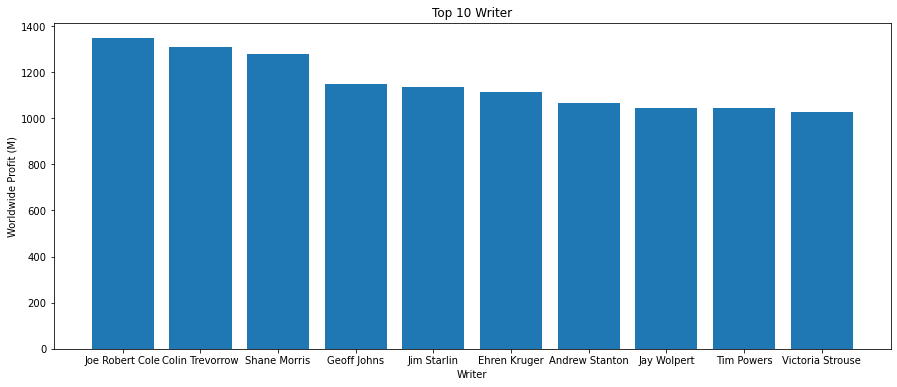

In [263]:
# Create the dataframe that only contains job = writer
df_writer = df_merged.loc[df_merged['job'] == 'writer']
# Create the data by grouping name of the writer by the average worldwide gross profit
profit_writer = df_writer.groupby(['primary_name']).worldwide_gross.mean()/(10**6)

profit_writer = profit_writer.sort_values(ascending = False)
profit_writer = profit_writer.nlargest(n=10)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Set x and y data
x = profit_writer.index
y = profit_writer.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Top 10 Writer')
ax.set_xlabel('Writer')
ax.set_ylabel('Worldwide Profit (M)')
# Save figure
plt.savefig('Top 10 Writers.png')

In [271]:
t_m = pd.read_csv('tmdb.movies.csv')
t_m

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
98,98,"[14, 12, 28, 9648]",35552,fr,Les Aventures extraordinaires d'Adèle Blanc-Sec,11.221,2010-04-14,The Extraordinary Adventures of Adèle Blanc-Sec,6.0,671
110,110,"[28, 53, 80]",15357,fr,Banlieue 13 - Ultimatum,10.661,2010-02-05,District 13: Ultimatum,6.1,555
169,169,"[10749, 35]",41211,fr,L'arnacoeur,9.241,2010-09-10,Heartbreaker,6.6,761
180,180,"[18, 10752, 9648]",46738,fr,Incendies,8.973,2010-09-04,Incendies,8.1,1034
193,193,"[28, 80, 53]",37645,fr,L'Immortel,8.697,2010-03-24,22 Bullets,6.5,508
...,...,...,...,...,...,...,...,...,...,...
26306,26306,"[99, 36, 10770]",554977,fr,"Sauvages, au coeur des zoos humains",0.600,2018-12-11,Savages: The Story of Human Zoos,8.0,1
26357,26357,[99],562269,fr,The Scrooge Mystery,0.600,2018-10-31,The Scrooge Mystery,7.0,1
26396,26396,"[18, 10751]",574534,fr,Des fleurs,0.600,2018-08-08,Flowers,6.0,1
26432,26432,"[18, 35]",467746,fr,Contes de Juillet,0.600,2018-03-09,July Tales,6.0,1


In [272]:
t_m.drop(columns=['Unnamed: 0', 'original_language', 'original_title'], inplace=True)

In [273]:
t_m

,genre_ids,id,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,0.600,2018-06-22,Trailer Made,0.0,1


In [274]:
t_m.drop(columns=['genre_ids', 'id', 'vote_average', 'vote_count'], inplace=True)

In [281]:
t_m = t_m.drop('popularity', 1)

In [282]:
df_merged2 = df_merged.merge(t_m, on = 'title', how = 'inner')

In [283]:
df_merged2

,title,studio,year,worldwide_gross,worldwide_gross(millions),genre 1,genre 2,genre 3,genre1,job,primary_name,release_date
0,Toy Story 3,BV,2010,1.067000e+09,1067.0,Adventure,Animation,Comedy,Adventure,composer,Randy Newman,2010-06-17
1,Toy Story 3,BV,2010,1.067000e+09,1067.0,Adventure,Animation,Comedy,Adventure,actor,Tom Hanks,2010-06-17
2,Toy Story 3,BV,2010,1.067000e+09,1067.0,Adventure,Animation,Comedy,Adventure,actor,Tim Allen,2010-06-17
3,Toy Story 3,BV,2010,1.067000e+09,1067.0,Adventure,Animation,Comedy,Adventure,actor,Joan Cusack,2010-06-17
4,Toy Story 3,BV,2010,1.067000e+09,1067.0,Adventure,Animation,Comedy,Adventure,actor,Ned Beatty,2010-06-17
...,...,...,...,...,...,...,...,...,...,...,...,...
15780,"Paul, Apostle of Christ",Affirm,2018,2.310000e+07,23.1,Adventure,Biography,Drama,Adventure,director,Andrew Hyatt,2018-03-28
15781,"Paul, Apostle of Christ",Affirm,2018,2.310000e+07,23.1,Adventure,Biography,Drama,Adventure,writer,Terence Berden,2018-03-28
15782,"Paul, Apostle of Christ",Affirm,2018,2.310000e+07,23.1,Adventure,Biography,Drama,Adventure,producer,David Zelon,2018-03-28
15783,"Paul, Apostle of Christ",Affirm,2018,2.310000e+07,23.1,Adventure,Biography,Drama,Adventure,composer,Jan A.P. Kaczmarek,2018-03-28


In [286]:
df_merged2.drop(columns = ['studio', 'year', 'genre1', 'worldwide_gross'], inplace = True)

In [287]:
df_merged2

,title,worldwide_gross(millions),genre 1,genre 2,genre 3,job,primary_name,release_date
0,Toy Story 3,1067.0,Adventure,Animation,Comedy,composer,Randy Newman,2010-06-17
1,Toy Story 3,1067.0,Adventure,Animation,Comedy,actor,Tom Hanks,2010-06-17
2,Toy Story 3,1067.0,Adventure,Animation,Comedy,actor,Tim Allen,2010-06-17
3,Toy Story 3,1067.0,Adventure,Animation,Comedy,actor,Joan Cusack,2010-06-17
4,Toy Story 3,1067.0,Adventure,Animation,Comedy,actor,Ned Beatty,2010-06-17
...,...,...,...,...,...,...,...,...
15780,"Paul, Apostle of Christ",23.1,Adventure,Biography,Drama,director,Andrew Hyatt,2018-03-28
15781,"Paul, Apostle of Christ",23.1,Adventure,Biography,Drama,writer,Terence Berden,2018-03-28
15782,"Paul, Apostle of Christ",23.1,Adventure,Biography,Drama,producer,David Zelon,2018-03-28
15783,"Paul, Apostle of Christ",23.1,Adventure,Biography,Drama,composer,Jan A.P. Kaczmarek,2018-03-28


In [288]:
pd.to_datetime(df_merged2['release_date'])
df_merged2['month'] = pd.DatetimeIndex(df_merged2['release_date']).month


In [292]:
df_merged2.rename({'worldwide_gross(millions)':'worldwide_gross'}, axis =1, inplace=True)
df_merged2

,title,worldwide_gross,genre 1,genre 2,genre 3,job,primary_name,release_date,month
0,Toy Story 3,1067.0,Adventure,Animation,Comedy,composer,Randy Newman,2010-06-17,6
1,Toy Story 3,1067.0,Adventure,Animation,Comedy,actor,Tom Hanks,2010-06-17,6
2,Toy Story 3,1067.0,Adventure,Animation,Comedy,actor,Tim Allen,2010-06-17,6
3,Toy Story 3,1067.0,Adventure,Animation,Comedy,actor,Joan Cusack,2010-06-17,6
4,Toy Story 3,1067.0,Adventure,Animation,Comedy,actor,Ned Beatty,2010-06-17,6
...,...,...,...,...,...,...,...,...,...
15780,"Paul, Apostle of Christ",23.1,Adventure,Biography,Drama,director,Andrew Hyatt,2018-03-28,3
15781,"Paul, Apostle of Christ",23.1,Adventure,Biography,Drama,writer,Terence Berden,2018-03-28,3
15782,"Paul, Apostle of Christ",23.1,Adventure,Biography,Drama,producer,David Zelon,2018-03-28,3
15783,"Paul, Apostle of Christ",23.1,Adventure,Biography,Drama,composer,Jan A.P. Kaczmarek,2018-03-28,3


In [293]:
profit_month = df_merged2.groupby(['month']).worldwide_gross.mean()

Text(0, 0.5, 'Worldwide Profit (M)')

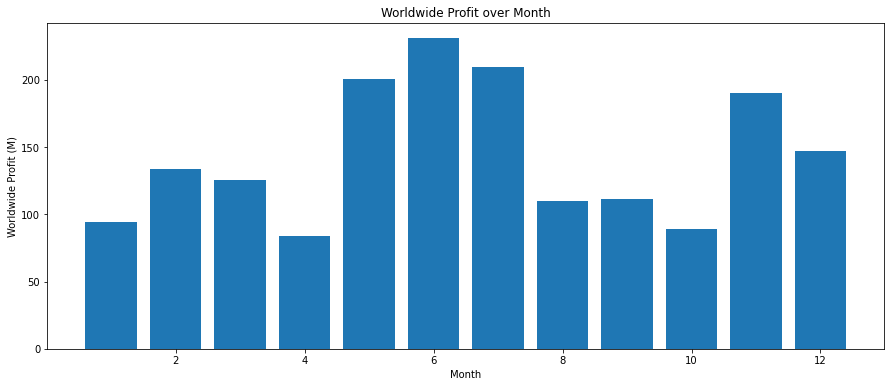

In [297]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Set x and y data
x = profit_month.index
y = profit_month.values 
# Create bar chart
ax.bar(x, y) 
# Set title and labels
ax.set_title('Worldwide Profit over Month')
ax.set_xlabel('Month')
ax.set_ylabel('Worldwide Profit (M)')
# Save figure
#plt.savefig('Worldwide Profit over Month.png')

In [331]:
m_b = pd.read_csv('tn.movie_budgets.csv')
m_b

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [333]:
m_b.info()
m_b.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [334]:
m_b = m_b.drop(columns=['release_date', 'id', 'domestic_gross'], axis = 1)
m_b

,movie,production_budget,worldwide_gross
0,Avatar,"$425,000,000","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"
...,...,...,...
5777,Red 11,"$7,000",$0
5778,Following,"$6,000","$240,495"
5779,Return to the Land of Wonders,"$5,000","$1,338"
5780,A Plague So Pleasant,"$1,400",$0


In [335]:
m_b.rename({'movie' : 'title'}, axis = 1, inplace=True)
m_b

,title,production_budget,worldwide_gross
0,Avatar,"$425,000,000","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"
...,...,...,...
5777,Red 11,"$7,000",$0
5778,Following,"$6,000","$240,495"
5779,Return to the Land of Wonders,"$5,000","$1,338"
5780,A Plague So Pleasant,"$1,400",$0


In [337]:
mb2 = m_b
mb2

,title,production_budget,worldwide_gross
0,Avatar,"$425,000,000","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"
...,...,...,...
5777,Red 11,"$7,000",$0
5778,Following,"$6,000","$240,495"
5779,Return to the Land of Wonders,"$5,000","$1,338"
5780,A Plague So Pleasant,"$1,400",$0


In [340]:
mb2[mb2.columns[1:]] = mb2[mb2.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
m_b

,title,production_budget,worldwide_gross
0,Avatar,425000000.0,2.776345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09
2,Dark Phoenix,350000000.0,1.497624e+08
3,Avengers: Age of Ultron,330600000.0,1.403014e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09
...,...,...,...
5777,Red 11,7000.0,0.000000e+00
5778,Following,6000.0,2.404950e+05
5779,Return to the Land of Wonders,5000.0,1.338000e+03
5780,A Plague So Pleasant,1400.0,0.000000e+00


In [341]:
m_b['profit'] = m_b['worldwide_gross'] - m_b['production_budget']

In [342]:
m_b['ROI'] = m_b['profit']*100/m_b['production_budget']
m_b

,title,production_budget,worldwide_gross,profit,ROI
0,Avatar,425000000.0,2.776345e+09,2.351345e+09,553.257713
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,6.350639e+08,154.667286
2,Dark Phoenix,350000000.0,1.497624e+08,-2.002376e+08,-57.210757
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,1.072414e+09,324.384139
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,9.997217e+08,315.369636
...,...,...,...,...,...
5777,Red 11,7000.0,0.000000e+00,-7.000000e+03,-100.000000
5778,Following,6000.0,2.404950e+05,2.344950e+05,3908.250000
5779,Return to the Land of Wonders,5000.0,1.338000e+03,-3.662000e+03,-73.240000
5780,A Plague So Pleasant,1400.0,0.000000e+00,-1.400000e+03,-100.000000


In [343]:
df_merged3 = df_merged2.merge(m_b, on = 'title', how = 'inner')
df_merged3

,title,worldwide_gross_x,genre 1,genre 2,genre 3,job,primary_name,release_date,month,production_budget,worldwide_gross_y,profit,ROI
0,Toy Story 3,1067.0,Adventure,Animation,Comedy,composer,Randy Newman,2010-06-17,6,200000000.0,1.068880e+09,868879522.0,434.439761
1,Toy Story 3,1067.0,Adventure,Animation,Comedy,actor,Tom Hanks,2010-06-17,6,200000000.0,1.068880e+09,868879522.0,434.439761
2,Toy Story 3,1067.0,Adventure,Animation,Comedy,actor,Tim Allen,2010-06-17,6,200000000.0,1.068880e+09,868879522.0,434.439761
3,Toy Story 3,1067.0,Adventure,Animation,Comedy,actor,Joan Cusack,2010-06-17,6,200000000.0,1.068880e+09,868879522.0,434.439761
4,Toy Story 3,1067.0,Adventure,Animation,Comedy,actor,Ned Beatty,2010-06-17,6,200000000.0,1.068880e+09,868879522.0,434.439761
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,"Paul, Apostle of Christ",23.1,Adventure,Biography,Drama,director,Andrew Hyatt,2018-03-28,3,5000000.0,2.552950e+07,20529498.0,410.589960
12445,"Paul, Apostle of Christ",23.1,Adventure,Biography,Drama,writer,Terence Berden,2018-03-28,3,5000000.0,2.552950e+07,20529498.0,410.589960
12446,"Paul, Apostle of Christ",23.1,Adventure,Biography,Drama,producer,David Zelon,2018-03-28,3,5000000.0,2.552950e+07,20529498.0,410.589960
12447,"Paul, Apostle of Christ",23.1,Adventure,Biography,Drama,composer,Jan A.P. Kaczmarek,2018-03-28,3,5000000.0,2.552950e+07,20529498.0,410.589960
